#Problem 2
*   Apply only **Neural network/Deep neural network** for the **Ekush** dataset and build a binary classification model that can predict  **male/female** from Bengali handwritten digits with different hyperparameter settings.  

##Introduction To Neural Network


Handwritten digits can be used to detect different qualities of a person.  

In this experiment we are going to use **Deep Neural Network** to recognize male/female from Bengali handwritten digits. This will be a supervised learning technique using Neural networks.

Neural networks are **called feedforward neural networks** where the output from one layer is used as input to the next layer. This means there are no loops in the network - information is always fed forward, never fed back. This is the type of approach we are going to take. There may be multiple hidden layers in between the input and the output. If there is only one/two hidden layers it is called a **shallow neural network**. 

For example, the following **two-layer network** has ***two*** **hidden layers**: 

<div align="center">
<img src="https://drive.google.com/uc?export=view&id=166QVjs64g0Q1KsxiokYQNTHbGyBlydOT" width="500">
</div>

The following steps occur in this neural network:


*   Input is passed through the 1st hidden layer.
*   The 1st hidden layers is connected to all the nodes of the input layer which then computes output and passes to the 2nd hidden layer.
*   The 2nd hidden layer computes output and passed to the final output layer which gives a final result.

The dataset we'll be using is **Ekush** dataset, a dataset which contains pixel value of about **30,830** images. It is a labelled dataset with informative tags which are manually annotated. It contains information about male and female handwritten digits which will help to do detect the male and female writing. This is a binary classification problem.

<div align="center">
<img src="https://drive.google.com/uc?id=1GhuJfYchOjfNoBtwkpWivPRQinegMYwy" width="600">
</div>

**Dataset Link:** https://shahariarrabby.github.io/ekush/#home







**Data Processing**

Let's start by importing all of the modules we'll need. The main ones we need to import are:
- os  module provides a portable way of using operating system dependent functionality along with the directories
- shutil module helps to handle high-level file and directory.
- numpy helps to handle data in a more efficient way by creating numpy arrays.
- Pandas library helps to read the csv file contents.
- Tensor creates multi-dimensional matrix containing elements of a single data type.
- torch for general PyTorch functionality
- torch.nn and torch.nn.functional for neural network based functions
- torch vision is a part of PyTorch which consists of popular datasets,model, architectures and frequently used for image transformation.
- torchvision.transforms for data augmentation.
- torchvision.datasets for loading the dataset
- torch.optim for our optimizer which will update the parameters of our neural network
- torch.utils.data and torch.utils.data.sampler for handling the dataset  
- matplotlib for plotting
- PIL is python imaging library used to handle images.

In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
from torch import tensor

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

##Loading the dataset in the directory

In order to read the data stored in google drive we have to at first mount the google drive with colab. The following cells shows how to mount with it.

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Define the path of the directory file where it is stored

In [ ]:
# Path to the directory where the data is stored 
path = "/content/drive/MyDrive/4.2/sc/"
os.listdir(path)

['archive.zip',
 'dataset',
 'numta_logistic.pkl',
 'maleDigits.csv',
 'femaleDigits.csv',
 'numta_logistic1.pkl',
 'numta_logistic40.pkl',
 'numta_logistic37.pkl',
 'Capture2.JPG',
 'dataset.JPG',
 'numta_logistic38128.pkl',
 'numta_logistic31.pkl',
 'numta_logistic128_39.pkl',
 'sigmoid.JPG',
 '160204073_Assignment#1.pdf',
 'CG_Q2_160204073.pdf',
 'Relu_4Layer_128.pkl',
 'Relu_2Layer_210.pkl',
 'Relu_5Layer_250.pkl',
 'Capture.JPG',
 'Relu3_39.pkl',
 'Relu3_55.pkl',
 'assm2.JPG',
 'ass3.JPG',
 'ass4.JPG',
 'ass5.JPG',
 'ass6.JPG']

Two csv files are read which contains the pixels and labels of each image.

*   **Csv file containing all the female written digits**
*   **Csv file containing all the male written digits**



In [ ]:
female_csv =  pd.read_csv('/content/drive/MyDrive/4.2/sc/femaleDigits.csv') 
male_csv =  pd.read_csv('/content/drive/MyDrive/4.2/sc/maleDigits.csv')

In [ ]:
female_csv.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,112
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,255,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,112
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,112
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,36,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,112
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,235,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,112


In [ ]:
male_csv.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,252,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,194,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,167,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112


## Preparing the Training Dataset

We now prepare our dataset for this problem so that  it can be easily accessed to train our model. So, we need to merge the csv files into one. And before that we need to give label for each gender. 

A **gender column** is added to both the csv files to make it a binary classification problem.


*  0 added to the female column
*  1 added to the male column

This will make it easier to distinguish between the 2 types.

In [ ]:
path='/content/drive/MyDrive/4.2/sc/'
def addColumn(csv_filename,label):
  df = pd.read_csv(path + csv_filename)
  df["gender"] = label
  df.to_csv("sample.csv", index=False)
  return df

In [ ]:
female_csv = addColumn('femaleDigits.csv',0)
male_csv =addColumn('maleDigits.csv',1)

In [ ]:
# printing all the column names to check if gender column is added

for col in female_csv.columns: 
    print(col) 
print("==============")
for col in male_csv.columns: 
    print(col) 

pixel0
pixel1
pixel2
pixel3
pixel4
pixel5
pixel6
pixel7
pixel8
pixel9
pixel10
pixel11
pixel12
pixel13
pixel14
pixel15
pixel16
pixel17
pixel18
pixel19
pixel20
pixel21
pixel22
pixel23
pixel24
pixel25
pixel26
pixel27
pixel28
pixel29
pixel30
pixel31
pixel32
pixel33
pixel34
pixel35
pixel36
pixel37
pixel38
pixel39
pixel40
pixel41
pixel42
pixel43
pixel44
pixel45
pixel46
pixel47
pixel48
pixel49
pixel50
pixel51
pixel52
pixel53
pixel54
pixel55
pixel56
pixel57
pixel58
pixel59
pixel60
pixel61
pixel62
pixel63
pixel64
pixel65
pixel66
pixel67
pixel68
pixel69
pixel70
pixel71
pixel72
pixel73
pixel74
pixel75
pixel76
pixel77
pixel78
pixel79
pixel80
pixel81
pixel82
pixel83
pixel84
pixel85
pixel86
pixel87
pixel88
pixel89
pixel90
pixel91
pixel92
pixel93
pixel94
pixel95
pixel96
pixel97
pixel98
pixel99
pixel100
pixel101
pixel102
pixel103
pixel104
pixel105
pixel106
pixel107
pixel108
pixel109
pixel110
pixel111
pixel112
pixel113
pixel114
pixel115
pixel116
pixel117
pixel118
pixel119
pixel120
pixel121
pixel122
pix

The two csv files are merged together to create a **single training dataset** for both male and female handwritten letters.

In [ ]:
total_csv = [male_csv, female_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))
merged_csv.to_csv("train.csv", index=False)
pd.read_csv("train.csv")

30830


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,gender
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112,1
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112,1
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112,1
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30825,0,1,0,0,1,0,2,1,0,0,0,0,5,4,4,2,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,3,2,1,17,94,65,16,...,121,69,1,1,2,1,1,0,0,0,0,2,3,0,13,100,153,142,23,29,1,3,0,1,1,1,3,25,86,23,1,2,0,0,0,0,0,0,121,0
30826,0,0,0,3,1,198,223,14,2,2,2,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,4,0,193,255,89,3,9,4,2,...,2,2,7,82,84,0,3,2,1,0,0,0,0,1,1,0,0,1,0,0,0,2,2,1,1,0,0,0,1,1,0,0,0,3,1,1,0,1,121,0
30827,0,0,0,0,0,0,0,0,0,0,0,1,1,0,29,8,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,4,2,1,1,0,0,0,0,0,0,0,1,0,1,2,2,0,0,0,0,2,0,25,243,188,19,1,5,1,1,1,1,0,0,0,0,0,0,121,0
30828,1,1,1,1,1,1,1,5,5,5,0,0,0,0,0,0,0,7,6,5,2,2,2,0,0,0,0,0,1,3,1,0,2,2,0,0,0,0,2,27,...,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,0


##Reshaping the images in the dataset

All the images are reshaped 28x28 black and white images, and the gender column based on which the classification will be done is passed in the `Y_train` and the pixels are passed in the `X_train`. 

We also want to normalize our data. Normalizing our data allows a models to train faster. It also helps to avoid local minima, i.e. train more reliably and distributes the data for training easily. So, we have normalized the  `X_train` values for each channel by dividing every value by 255. This will equally distribute the data and bring it in a range of 0-1.

In [ ]:
# Library

# Load Data
train = pd.read_csv("train.csv")

# Separating Data and Label
Y_train = train["gender"] # contains only the gender column
X_train = train.drop(labels = ["gender","label"],axis = 1) # only the pixel value remains

# Normalize the data
X_train = X_train / 255.0

# Reshape the array into 28 x 28 pixel
X_train = X_train.values.reshape(-1,28,28) 

`Y_train` and `X_train` are converted to tensor data.

In [ ]:
from torch import tensor
##converting x_train and y_train to tensor
x_data=tensor(X_train) 
y_data=tensor(Y_train)

##Properties of the training dataset

The train dataset which is a list is build up with pixel values in first index the label in the 2nd index 

In [ ]:
train_dataset=[[0]*2 for i in range(len(x_data))]
#  The dataset is merged with image and gender type
for i in range(len(x_data)):
  train_dataset[i][0]= x_data[i]
  train_dataset[i][1] = y_data[i].item()

In [ ]:
# One Image Size
print(train_dataset[0][0].size())
print(train_dataset[0][0].numpy().shape)
# First Image Label
print(train_dataset[0][1])

torch.Size([28, 28])
(28, 28)
1


In [ ]:
#format of the train_dataset
print(train_dataset[0])

[tensor([[0.0000, 0.0078, 0.0000, 0.0039, 0.0039, 0.0039, 0.0039, 0.0000, 0.0078,
         0.0118, 0.0000, 0.0000, 0.0118, 0.0000, 0.0039, 0.0039, 0.0196, 0.0118,
         0.0118, 0.0078, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0078, 0.0039,
         0.0039],
        [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0039, 0.0157, 0.0118,
         0.0196, 0.0118, 0.0157, 0.0118, 0.0157, 0.0196, 0.0157, 0.0000, 0.0000,
         0.0000, 0.0235, 0.0078, 0.0000, 0.0000, 0.0039, 0.0039, 0.0039, 0.0118,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0078, 0.0039, 0.0118, 0.0078, 0.0157, 0.0039,
         0.0784, 0.8980, 0.8706, 0.8627, 0.8667, 0.8627, 0.8588, 0.3529, 0.2196,
         0.1961, 0.0000, 0.0078, 0.0235, 0.0235, 0.0118, 0.0078, 0.0039, 0.0000,
         0.0039],
        [0.0039, 0.0039, 0.0039, 0.0039, 0.0039, 0.0039, 0.0118, 0.0000, 0.0353,
         0.6157, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9922, 1.0000, 1.0000,
         0.9647, 0.4118, 0.0000, 0.0000, 0.0039, 0.015

In [ ]:
print(X_train[0])

[[0.         0.00784314 0.         0.00392157 0.00392157 0.00392157
  0.00392157 0.         0.00784314 0.01176471 0.         0.
  0.01176471 0.         0.00392157 0.00392157 0.01960784 0.01176471
  0.01176471 0.00784314 0.         0.         0.         0.00392157
  0.         0.00784314 0.00392157 0.00392157]
 [0.         0.         0.         0.00392157 0.         0.
  0.00392157 0.01568627 0.01176471 0.01960784 0.01176471 0.01568627
  0.01176471 0.01568627 0.01960784 0.01568627 0.         0.
  0.         0.02352941 0.00784314 0.         0.         0.00392157
  0.00392157 0.00392157 0.01176471 0.        ]
 [0.         0.         0.         0.00784314 0.00392157 0.01176471
  0.00784314 0.01568627 0.00392157 0.07843137 0.89803922 0.87058824
  0.8627451  0.86666667 0.8627451  0.85882353 0.35294118 0.21960784
  0.19607843 0.         0.00784314 0.02352941 0.02352941 0.01176471
  0.00784314 0.00392157 0.         0.00392157]
 [0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157

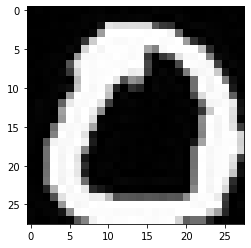

In [ ]:
#display an image from the dataset
show_img = X_train[0]

plt.imshow(show_img, cmap='gray')

Using the **matplotlib** python package 25 images of the training dataset are displayed.



In [ ]:
def plot_images(images):

    n_images = len(images)
    print(len(images)," images from training dataset are displayed")
    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))
    print(rows,cols)
    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap = 'bone')
        ax.axis('off')

25  images from training dataset are displayed
5 5


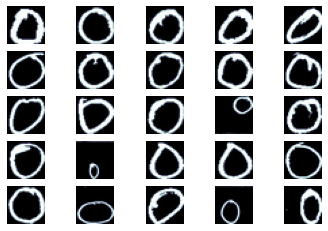

In [ ]:
N_IMAGES =25

images = [image for image, label in [train_dataset[i] for i in range(N_IMAGES)]] 

plot_images(images)


In [ ]:
#the GPU version currently available
print(torch.__version__)

print(torch.cuda.get_device_name())

1.7.1+cu101
Tesla T4


## Defining the Model 

Our model will be a neural network, with different hypermeter settings. 

### Expanding Neural Network variants

There are **2 ways** to expand a neural network
- Different non-linear activation
- More hidden layers

The image below shows the archicture of the model we will take in our first setting. It is a 3 layer deep neural network. with 784(28*28) inputs and 10 ouputs and 3 hidden layer in between.

<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1fUWIS2OZDG970lFMEhGM0c8spo-Zx0FD" width="500">
</div>


At first we will **flatten** our 1x28x28 (1 color channel, 28 pixels height and width) image into a 784 element vector, also called 784 *features*. Next, the 784 dimensional input is passed through the first hidden layer to transform it into 64 dimensions. Then these output is passed to each neuron of 2nd hidden layer. similar occurence happen from 2nd to 3rd hidden layer.  Finally, an output layer which will transform it into a 10 dimensional vector. Each hidden layers are fully connected to the other. The output dimension should equal the number of classes within our data. Here we have ten digits, 0 - 9, so need our output to be 10 dimensions.

The transformation between 784 to 64, 64 to 64, 64 to 64  and 64 to 10 dimensions are done by **`Linear`** layers. These are also known as fully connected or affine layers. In these layers every element in one layer is connected to every element in the next. These elements can be visualised ***neurons*** as this architecture is inspired by how the human brain is made of millions of interconnected nodes, also called neurons. 



Now we are going to try out different setting to get the best accuracy.


## Setting_1: **3 Layer** Deep Neural Network with **Tanh** Activation.
### **Parameters**
- **totaldata:** 30,830
- **minibatch:** 200
- **iterations:**6,000
- **learning rate**: 0.1
-**Hidden Layer:** 64
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 6000 \div \frac{30,830}{200} = 38.22\approx 38$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 2**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
-**Accuracy:** 63.31%

In [ ]:
# Hyperparameters
batch_size = 200
num_iters = 6000
input_dim = 28*28 # num_features = 784
num_hidden = 100
output_dim = 2
learning_rate = 0.1

Now for testing purpose the training data is split into 90:10 ratio. The testing set which is of 10% should be created from the training set. Although there is a test set present in the NumtaDB dataset, the test set maybe not be same for the specific training set. That is why the validation set or training set is made form the training set.

It is always better to **shuffle the indices of the training set** .We only need to shuffle our training set as it will be used for stochastic gradient descent and we want the each batch to be different between epochs. 

`DataLoader`  is defined for each of the training/test sets. We can iterate over these and they will yield batches of images and labels which we can use to train our model.

In [ ]:
#batch size
batch_size = 200
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))# check the size of the training dataloader
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:139
Test dataloader:16


#### Step #1 : Design model using class



*   Using Tanh activation function in each hidden layer.
*   3 hidden layer neural model is built.






In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.Tanh()

        ### 2nd hidden layer: 128--> 128
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.Tanh()

        ### 3rd hidden layer: 128--> 128
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.Tanh()



        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd  hidden layer
        out = self.relu_3(out)

   

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

We place our model and criterion on to the device by using the `.to` method. We then define `device`. This is used to place your model and data on to a GPU, if you have one.

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (relu_1): Tanh()
  (linear_2): Linear(in_features=100, out_features=100, bias=True)
  (relu_2): Tanh()
  (linear_3): Linear(in_features=100, out_features=100, bias=True)
  (relu_3): Tanh()
  (linear_out): Linear(in_features=100, out_features=2, bias=True)
)


###Step #2 : Construct loss and optimizer

Unlike linear regression, we do not use **MSE** here, we need **Cross Entropy Loss** to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes Tanh activation function.
2. Computes Cross Entropy Loss

The Tanh activation function is  structure similar to sigmoid function. In this case it is a range of values from -1 to 1.

*   The advantage over the sigmoid function is that its derivative is more steep, which means it can get
more value.
*   This means that it will be more efficient
because it has a wider range for faster learning
and grading



<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1FeIw7AjRnoCSNG3DiU3j6QhUi-k_d9vr" width="500">
</div>



One thing to note is that we do not use an activation function on the input directly or on the output. Activation functions **should never** be used directly on the input. PyTorch combines activation functions to be applied on the output with the functions which calculate the *loss*, also known as *error* or *cost*, of a neural network. This is done for numerical stability.


Next, our optimizer needs to be defined which will update the parameters of our model with respect to the loss calculated on the data. Here we used Stochastic gradient descent(SGD) as our optimizer that makes forward and backward propagation for every record.

SGD algorithm is used with its default parameters and learning rate passed in it. Although there are different optimizers SGD can work well for logistic regression. There are more optimizers that can be experimented in this [article](https://ruder.io/optimizing-gradient-descent/).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


###Step #3: Training the model: forward, loss, backward, step




  



In [ ]:

iter = 0
iteration_loss = []
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

38
Iteration: 500. Loss: 0.6653831005096436. Accuracy: 59.29289652935452
Iteration: 1000. Loss: 0.6835734844207764. Accuracy: 60.298410638987995
Iteration: 1500. Loss: 0.6504639387130737. Accuracy: 61.17418099253973
Iteration: 2000. Loss: 0.6287280321121216. Accuracy: 61.30392474862147
Iteration: 2500. Loss: 0.6721437573432922. Accuracy: 59.74699967564061
Iteration: 3000. Loss: 0.6279600858688354. Accuracy: 62.860849821602336
Iteration: 3500. Loss: 0.679714024066925. Accuracy: 61.69315601686669
Iteration: 4000. Loss: 0.6480488777160645. Accuracy: 62.7311060655206
Iteration: 4500. Loss: 0.5889824628829956. Accuracy: 62.860849821602336
Iteration: 5000. Loss: 0.5788614153862. Accuracy: 63.31495296788842


### Step#4: Graph Plot of loss function with each iteration.

[0.6691949367523193, 0.6888902187347412, 0.6224290728569031, 0.5610945820808411, 0.6178911328315735, 0.686910092830658, 0.6619442701339722, 0.61330646276474, 0.5080469250679016, 0.46178916096687317, 0.5665790438652039, 0.5471168160438538, 0.3292723596096039, 0.28471463918685913, 0.3414006531238556, 0.3228723406791687, 0.241251602768898, 0.22774946689605713, 0.4493647813796997, 0.15879030525684357, 0.15584233403205872]


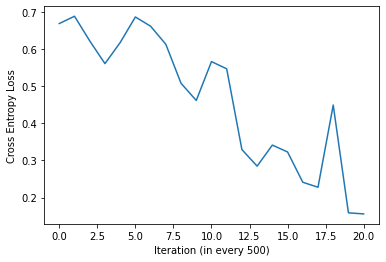

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

Saving Model to directory

In [ ]:
import pickle
save_model = True


if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Relu_4Layer_128.pkl') 

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=100, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=100, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


[0.6691949367523193, 0.6888902187347412, 0.6224290728569031, 0.5610945820808411, 0.6178911328315735, 0.686910092830658, 0.6619442701339722, 0.61330646276474, 0.5080469250679016, 0.46178916096687317, 0.5665790438652039, 0.5471168160438538, 0.3292723596096039, 0.28471463918685913, 0.3414006531238556, 0.3228723406791687, 0.241251602768898, 0.22774946689605713, 0.4493647813796997, 0.15879030525684357, 0.15584233403205872]


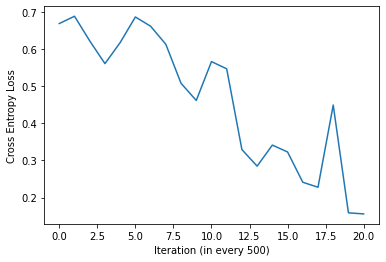

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
import pickle
save_model = True


if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Relu_4Layer_128.pkl') 

NameError: ignored


## Setting_2: **3 Layer** Deep Neural Network with **ReLU** Activation.
### **Parameters**
- **totaldata:** 30,830
- **minibatch:** 200
- **iterations:**12,000
- **learning rate**: 0.1
-**Hidden Layer:** 100
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 12000 \div \frac{30,830}{200} = 77.5\approx 77$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 2**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
-**Accuracy:** 63.28%

In [ ]:
# Hyperparameters
batch_size = 200
num_iters = 12000
input_dim = 28*28 # num_features = 784
num_hidden = 100
output_dim = 2
learning_rate = 0.1

#### Step #1 : Design model using class



*   Using RelU activation function in each hidden layer.
*   3 hidden layer neural model is built.






In [ ]:
#batch size
batch_size = 200
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))# check the size of the training dataloader
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:139
Test dataloader:16


In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 128--> 128
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 128--> 128
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()



        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd  hidden layer
        out = self.relu_3(out)

   

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
        

We place our model and criterion on to the device by using the `.to` method. We then define `device`. This is used to place your model and data on to a GPU, if you have one.

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=120, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=120, out_features=120, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=120, out_features=120, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=120, out_features=2, bias=True)
)


###Step #2 : Construct loss and optimizer

Unlike linear regression, we do not use **MSE** here, we need **Cross Entropy Loss** to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes ReLU activation function.
2. Computes Cross Entropy Loss


The ReLU activation function is a popular non-linear function that is simply **$max(0, x)$**, where $x$ is the weighted sum of the inputs to that neuron. Other activation functions used are hyperbolic tan (tanh) and sigmoid function, however ReLU is the most commonly used.

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/relu.png?raw=1)


One thing to note is that we do not use an activation function on the input directly or on the output. Activation functions **should never** be used directly on the input. PyTorch combines activation functions to be applied on the output with the functions which calculate the *loss*, also known as *error* or *cost*, of a neural network. This is done for numerical stability.


Next, our optimizer needs to be defined which will update the parameters of our model with respect to the loss calculated on the data. Here we used Stochastic gradient descent(SGD) as our optimizer that makes forward and backward propagation for every record.

SGD algorithm is used with its default parameters and learning rate passed in it. Although there are different optimizers SGD can work well for logistic regression. There are more optimizers that can be experimented in this [article](https://ruder.io/optimizing-gradient-descent/).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


###Step #3: Training the model: forward, loss, backward, step




  



In [ ]:

iter = 0
iteration_loss = []
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

77
Iteration: 500. Loss: 0.6728003621101379. Accuracy: 58.6117418099254
Iteration: 1000. Loss: 0.6699548959732056. Accuracy: 61.2390528705806
Iteration: 1500. Loss: 0.6025105714797974. Accuracy: 61.368796626662345
Iteration: 2000. Loss: 0.6015150547027588. Accuracy: 62.47161855335712
Iteration: 2500. Loss: 0.5861404538154602. Accuracy: 63.12033733376581
Iteration: 3000. Loss: 0.5568116307258606. Accuracy: 60.655205968212776
Iteration: 3500. Loss: 0.5260003805160522. Accuracy: 63.282517028867986
Iteration: 4000. Loss: 0.5689666867256165. Accuracy: 59.6496918585793
Iteration: 4500. Loss: 0.49443480372428894. Accuracy: 62.11482322413234
Iteration: 5000. Loss: 0.4844992458820343. Accuracy: 61.012001297437564
Iteration: 5500. Loss: 0.4080224931240082. Accuracy: 59.74699967564061
Iteration: 6000. Loss: 0.3772731423377991. Accuracy: 60.23353876094713
Iteration: 6500. Loss: 0.3861159384250641. Accuracy: 60.42815439506974
Iteration: 7000. Loss: 0.3357744514942169. Accuracy: 59.6496918585793
Ite

### Step#4: Graph Plot of loss function with each iteration.

[0.6869631409645081, 0.6434949636459351, 0.6521729230880737, 0.6132758855819702, 0.5632240772247314, 0.5991042852401733, 0.520346462726593, 0.6006367802619934, 0.5037937760353088, 0.6054319143295288, 0.4649193584918976, 0.44477158784866333, 0.3787938952445984, 0.291805624961853, 0.32036536931991577, 0.25028905272483826, 0.19526231288909912, 0.18172672390937805, 0.18331018090248108, 0.2573549151420593, 0.1644294112920761]


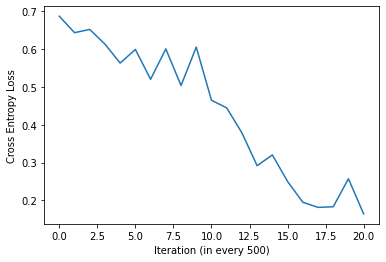

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

## Setting_3: **3 Layer** Deep Neural Network with **LeakyReLU** Activation.
### **Parameters**
- **totaldata:** 30,830
- **minibatch:** 128
- **iterations:**9,000
- **learning rate**: 0.05
-**Hidden Layer:** 64
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 9000 \div \frac{30,830}{128} = 37.52\approx 37$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 2**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
-**Accuracy:** 62.47%

In [ ]:
# Hyperparameters
batch_size =128
num_iters = 9000
input_dim = 28*28 # num_features = 784
num_hidden = 64
output_dim = 2
learning_rate = 0.05

In [ ]:
#batch size
batch_size = 128
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))# check the size of the training dataloader
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:217
Test dataloader:25


#### Step #1 : Design model using class



*   Using LeakyReLU activation function in each hidden layer.
*   4 hidden layer neural model is built.





In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 128--> 128
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 128--> 128
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.LeakyReLU()


        ### 3rd hidden layer: 128--> 128
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.LeakyReLU()


        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd  hidden layer
        out = self.relu_3(out)
        ### 3rd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 3rd  hidden layer
        out = self.relu_4(out)

   

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=64, bias=True)
  (relu_1): LeakyReLU(negative_slope=0.01)
  (linear_2): Linear(in_features=64, out_features=64, bias=True)
  (relu_2): LeakyReLU(negative_slope=0.01)
  (linear_3): Linear(in_features=64, out_features=64, bias=True)
  (relu_3): LeakyReLU(negative_slope=0.01)
  (linear_4): Linear(in_features=64, out_features=64, bias=True)
  (relu_4): LeakyReLU(negative_slope=0.01)
  (linear_out): Linear(in_features=64, out_features=2, bias=True)
)


###Step #2 : Construct loss and optimizer

Unlike linear regression, we do not use **MSE** here, we need **Cross Entropy Loss** to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes ReLU activation function.
2. Computes Cross Entropy Loss


The ReLU activation function is a popular non-linear function that is simply **$max(0.01z, z)$**, where $x$ is the weighted sum of the inputs to that neuron. Other activation functions used are hyperbolic tan (tanh) and sigmoid function, however ReLU is the most commonly used.


<div align="center">
<img src="https://drive.google.com/uc?export=view&id=16oexeNSpyVlXKIuype2YqnSDR37n6YTK" width="500">
</div>

One thing to note is that we do not use an activation function on the input directly or on the output. Activation functions **should never** be used directly on the input. PyTorch combines activation functions to be applied on the output with the functions which calculate the *loss*, also known as *error* or *cost*, of a neural network. This is done for numerical stability.


Next, our optimizer needs to be defined which will update the parameters of our model with respect to the loss calculated on the data. Here we used Stochastic gradient descent(SGD) as our optimizer that makes forward and backward propagation for every record.

SGD algorithm is used with its default parameters and learning rate passed in it. Although there are different optimizers SGD can work well for logistic regression. There are more optimizers that can be experimented in this [article](https://ruder.io/optimizing-gradient-descent/).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


###Step #3: Training the model: forward, loss, backward, step




  



In [ ]:

iter = 0
iteration_loss = []
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

37
Iteration: 500. Loss: 0.6898144483566284. Accuracy: 55.043788517677584
Iteration: 1000. Loss: 0.6672979593276978. Accuracy: 59.065844956211485
Iteration: 1500. Loss: 0.6999765634536743. Accuracy: 60.03892312682452
Iteration: 2000. Loss: 0.6804174184799194. Accuracy: 61.07687317547843
Iteration: 2500. Loss: 0.6513670086860657. Accuracy: 61.790463833927994
Iteration: 3000. Loss: 0.6168185472488403. Accuracy: 61.822899772948425
Iteration: 3500. Loss: 0.6166126728057861. Accuracy: 61.56341226078495
Iteration: 4000. Loss: 0.6473737359046936. Accuracy: 62.179695102173206
Iteration: 4500. Loss: 0.6129963994026184. Accuracy: 62.40674667531625
Iteration: 5000. Loss: 0.5065160989761353. Accuracy: 61.9850794680506
Iteration: 5500. Loss: 0.5688946843147278. Accuracy: 62.47161855335712
Iteration: 6000. Loss: 0.6259173154830933. Accuracy: 58.027894907557574
Iteration: 6500. Loss: 0.5543600916862488. Accuracy: 61.95264352903016
Iteration: 7000. Loss: 0.5426530838012695. Accuracy: 60.59033409017191

### Step#4: Graph Plot of loss function with each iteration.

[0.6898144483566284, 0.6672979593276978, 0.6999765634536743, 0.6804174184799194, 0.6513670086860657, 0.6168185472488403, 0.6166126728057861, 0.6473737359046936, 0.6129963994026184, 0.5065160989761353, 0.5688946843147278, 0.6259173154830933, 0.5543600916862488, 0.5426530838012695, 0.5182077288627625, 0.4338802397251129]


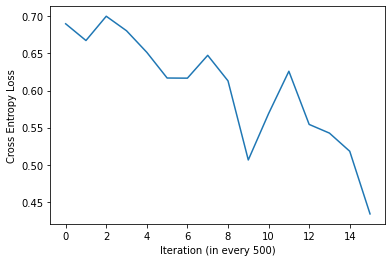

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()


## Setting_4: **3 Layer** Deep Neural Network with **ReLU** Activation.
### **Parameters**
- **totaldata:** 30,830
- **minibatch:** 128
- **iterations:**6,000
- **learning rate**: 0.05
-**Hidden Layer:** 64
-  **epochs** = $iterations \div \frac{totaldata}{minibatch} = 6000 \div \frac{30,830}{128} = 24.52\approx 24$
- **Input dimension:** $28 \times 28 = 784$
- **Output dimension: 2**
  - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
-**Accuracy:** 64.12%

In [ ]:
# Hyperparameters
batch_size =128
num_iters = 6000
input_dim = 28*28 # num_features = 784
num_hidden = 64
output_dim = 2
learning_rate = 0.05

Now for testing purpose the training data is split into 90:10 ratio. The testing set which is of 10% should be created from the training set. Although there is a test set present in the NumtaDB dataset, the test set maybe not be same for the specific training set. That is why the validation set or training set is made form the training set.

It is always better to **shuffle the indices of the training set** .We only need to shuffle our training set as it will be used for stochastic gradient descent and we want the each batch to be different between epochs. 

`DataLoader`  is defined for each of the training/test sets. We can iterate over these and they will yield batches of images and labels which we can use to train our model.

In [ ]:
#batch size
batch_size = 128
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))# check the size of the training dataloader
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:217
Test dataloader:25


#### Step #1 : Design model using class



*   Using ReLU activation function in each hidden layer.
*   4 hidden layer neural model is built.






In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 128--> 128
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 128--> 128
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()


        ### 3rd hidden layer: 128--> 128
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()


        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd  hidden layer
        out = self.relu_3(out)
        ### 3rd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 3rd  hidden layer
        out = self.relu_4(out)

   

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=64, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=64, out_features=64, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=64, out_features=64, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=64, out_features=64, bias=True)
  (relu_4): ReLU()
  (linear_out): Linear(in_features=64, out_features=2, bias=True)
)


###Step #2 : Construct loss and optimizer

Unlike linear regression, we do not use **MSE** here, we need **Cross Entropy Loss** to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes ReLU activation function.
2. Computes Cross Entropy Loss


The ReLU activation function is a popular non-linear function that is simply **$max(0, x)$**, where $x$ is the weighted sum of the inputs to that neuron. Other activation functions used are hyperbolic tan (tanh) and sigmoid function, however ReLU is the most commonly used.

![](https://github.com/bentrevett/pytorch-image-classification/blob/master/assets/relu.png?raw=1)


One thing to note is that we do not use an activation function on the input directly or on the output. Activation functions **should never** be used directly on the input. PyTorch combines activation functions to be applied on the output with the functions which calculate the *loss*, also known as *error* or *cost*, of a neural network. This is done for numerical stability.


Next, our optimizer needs to be defined which will update the parameters of our model with respect to the loss calculated on the data. Here we used Stochastic gradient descent(SGD) as our optimizer that makes forward and backward propagation for every record.

SGD algorithm is used with its default parameters and learning rate passed in it. Although there are different optimizers SGD can work well for logistic regression. There are more optimizers that can be experimented in this [article](https://ruder.io/optimizing-gradient-descent/).

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


###Step #3: Training the model: forward, loss, backward, step




  



In [ ]:

iter = 0
iteration_loss = []
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float()) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

77
Iteration: 500. Loss: 0.6691949367523193. Accuracy: 59.941615309763215
Iteration: 1000. Loss: 0.6888902187347412. Accuracy: 59.97405124878365
Iteration: 1500. Loss: 0.6224290728569031. Accuracy: 63.08790139474538
Iteration: 2000. Loss: 0.5610945820808411. Accuracy: 63.12033733376581
Iteration: 2500. Loss: 0.6178911328315735. Accuracy: 64.12585144339928
Iteration: 3000. Loss: 0.686910092830658. Accuracy: 58.027894907557574
Iteration: 3500. Loss: 0.6619442701339722. Accuracy: 59.00097307817061
Iteration: 4000. Loss: 0.61330646276474. Accuracy: 60.59033409017191
Iteration: 4500. Loss: 0.5080469250679016. Accuracy: 60.03892312682452
Iteration: 5000. Loss: 0.46178916096687317. Accuracy: 62.37431073629582
Iteration: 5500. Loss: 0.5665790438652039. Accuracy: 59.941615309763215
Iteration: 6000. Loss: 0.5471168160438538. Accuracy: 56.66558546869932
Iteration: 6500. Loss: 0.3292723596096039. Accuracy: 61.758027894907556
Iteration: 7000. Loss: 0.28471463918685913. Accuracy: 60.979565358417126


### Step#4: Graph Plot of loss function with each iteration.

[0.6781744360923767, 0.639981746673584, 0.6807144284248352, 0.633039116859436, 0.656189501285553, 0.6203173995018005, 0.5500540137290955, 0.6080343723297119, 0.5609063506126404, 0.5265325307846069, 0.41615885496139526, 0.3976467251777649, 0.3991192579269409, 0.5951392650604248, 0.3607514500617981, 0.3313312828540802, 0.27477121353149414, 0.22590802609920502, 0.24214915931224823, 0.3006533086299896, 0.21128012239933014, 0.15102511644363403, 2.3435189723968506, 0.08107641339302063, 0.10842210054397583, 0.05687861517071724, 0.05071568489074707]


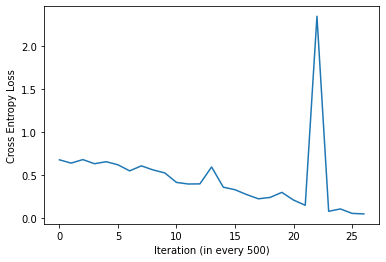

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

##**Result Analysis**

The hyperparameters are varied and tried out for different possibilities to get the best result. The following comparisions are seen while testing the dataset.

1. **Batch size**: A hyperparameter of gradient descent 

2. **Hidden Layers**: The increase or decrease in hidden layer change the accuracy of the model. There should be a balance between the batch size and hidden layer. The hidden layers shouldnt be made complex for easier computations.

3. **Epoch**: A hyperparameter that controls the number of complete passes through the training dataset. 
4. **Learning rate**: The amount with which the weights are updated to help the gradient descent converge.
5. **Iteration:** The number of batches needed to complete one epoch.
6. **Accuracy:** An evaluation metric used to predict the correctness of a machine learning model.






|Setting|   Mini-Batch Size | No of Neurons   | Iterations   | Learning Rate| Accuracy| Num of Epochs    |
| :-------------:| :-------------:| :-------------:| :----------: | :-----------:|:-----------:|:-----------:|
|1|     200   | 64    | 6000        | 0.1       |**63.31%**     |38           |
|2| 200    |64        | 12000         | 0.1        |60.103%       |77        |
|3|128    |64        |9000          | 0.05        |67.79%       |37          |
|4|128     |64      |6000        | 0.05        |60.72%       |24      |



###**3 hidden layers**
Here, for setting 1 and 2, **three** layer deep neural network is used varying the **iteration number** and **activation function**. Larger batch size train faster..The **learning rate** is kept 0.1 which is  a standard value.

For **Tanh** activation function the accuracy came slightly higher as it was computed when the GPU was faster compared to the **ReLU** activation function. Althought ReLU activation function should have given higher accuracy this is the reason it is slightly lower than Tanh.
<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1eHkmM_olKyTySxZmhe3Yyqpf5BwegaKb" width="500">
</div>


If we look at the loss vs iteration graph for these 2 setting we can see that for both cases the loss decreases with the iteration. Which shows it is not overfitted as there are no high amount of spikes.





###**4 hidden layers**


Here, for setting 3 and 4, **four** layer deep neural network is used varying the **iteration number** and **activation function**. Larger batch size train faster..The **learning rate** is kept 0.05 which is  a optimal for this case.

**ReLU** function works better than **LeakyReLU** in this case. Accuracy for ReLU function is higher.

<div align="center">
<img src="https://drive.google.com/uc?export=view&id=19S_TbH9Rv2q7iKjJCt2bM0Rx3iwvuFCv" width="500">
</div>


If we look at the loss vs iteration graph for these 2 setting we can see that for the 1st case we could have taken a little lower iteration as the spike suddenly increasd. But for the 2nd case the loss decreases with the iteration gradually which shows it is not overfitted as there are no high amount of spikes.






##Conclusion
There is no magic formula to tell us how many layers to use and how many neurons to have in each layer and there is most probably a better set of values. However, the general idea is that neural networks extract features from data. Layers closer to the input learn to extract general features (e.g. lines, curves, edges), whilst later layers combine the features extracted from the previous layer into more high level features (e.g. the intersection of two lines making a cross, multiple curves make a circle). We force our neural network to learn these features. This way it has to learn to compress information by extracting only the useful and general features. Thus, we want a neural network with multiple layers and some sort of information compression (reduced number of neurons in subsequent layers).